<style>
    h1 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
    }

    p {
        font-family: 'Times New Roman', Times, serif;
    }
</style>

<h1>Faktorët e performancës së studentëve</h1>

<p>Qëllimi i preprocesimit të datasetit <b>Faktorët e performancës së studentëve</b> është të strukturojë dhe pastrojë të dhënat për të lehtësuar analizën e thellë të ndikimeve në performancën akademike të studentëve. Ky proces siguron që të dhënat të jenë të pastra, të organizuara, dhe të gatshme për të zbuluar lidhjet kyçe që influencojnë suksesin e studentëve. Përmes kësaj analize të dhënash të përpunuara, mund të identifikohen dhe zbatohen strategji të efektshme arsimore që ndihmojnë në përmirësimin e arritjeve të studentëve dhe në ngritjen e cilësisë së proceseve mësimore.</p>

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Libraritë e përdorura</h3>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import zscore
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 20px;
    }
</style>
<h3>Leximi i datasetit</h3>

In [3]:
# Dataframe kryesor
main_df = pd.read_csv("../dataset/StudentPerformanceFactors.csv")

# Dataframe i preprocesuar
pre_df = pd.read_csv("../dataset/StudentPerformanceFactors_new.csv")

<style>
    h2 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 20px;
    }
</style>

<h2>1. FAZA E PARË</h2>

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px; 
        margin-bottom: 10px; 
    }
</style>
<h3>Kualiteti i të dhënave</h3>

<style>
    h4 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h4>Struktura e datasetit </h4>

In [4]:
display(main_df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<style>
    h4 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h4>Definimi i tipeve të të dhënave</h4>

In [5]:
print("Tipet e të dhënave: \n")
print(main_df.dtypes)

# Atributet kategorike dhe numerike
categorical_columns = main_df.select_dtypes(include=['object']).columns
numerical_columns = main_df.select_dtypes(include=['int64', 'float64']).columns

print("\nAtributet kategorike:", list(categorical_columns))
print("\nAtributet numerike :", list(numerical_columns))

Tipet e të dhënave: 

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

Atributet kategorike: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disab

<style>
    h4 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h4>Menaxhimi vlerave të zbrazëta (null):</h4>


In [6]:
# Metoda për gjetjen e vlerave null
null_counts = pre_df.isnull().sum()

print(null_counts)
has_nulls = pre_df.isnull().any()

print('\nAtributet që kanë vlera të zbrazëta (null):', ', '.join(has_nulls[has_nulls].index))

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Atributet që kanë vlera të zbrazëta (null): 


<style>
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<p>Në kodin më poshtë, kemi përpunuar të dhënat duke zëvëndësuar vlerat null me vlera të përshtatshme në varësi të tipit të atributit (kolonës). Fillimisht kemi bërë identifikimin e kolonave me vlera të zbrazëta të cilat ndahen në dy grupe: numerike dhe kategorike. Kolonat numerike zëvëndësohen me medianën për të shmangur ndikimin e outliers, ndërsa kolona të tjera numerike përdorin mesataren. Për kolonat kategorike, vlerat null zëvëndesohen me vlerën më të shpeshtë. Pas kësaj kontrollohet dataset-i për të siguruar që të gjitha vlerat <b>null</b> janë zëvëndësuar duke lejuar modifikimin direkt të të dhënave me <b>inplace=True</b> dhe duke parandaluar kopjet e padëshiruara.</p>

In [7]:
# Ndarja e kolonave në numerike dhe kategorike
numeric_cols = pre_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = pre_df.select_dtypes(include=['object', 'category']).columns

# Për kolonat numerike vendos medianen si vlerë në Exam_Score
pre_df.fillna({'Exam_Score': pre_df['Exam_Score'].median()}, inplace=True)

# Vendos vlerën mesatare në kolonat e tjera numerike
for col in numeric_cols:
    if col != 'Exam_Score':
        pre_df.fillna({col: pre_df[col].mean()}, inplace=True)

# Për kolonat kategorike plotëso vlerat e zbrazëta me vlerën më të shpeshtë
for col in categorical_cols:
    pre_df.fillna({col: pre_df[col].mode()[0]}, inplace=True)

# Kontrollo përsëri për vlerat e zbrazëta për të konfirmuar
print("Atributet që kanë vlera null:")
print(pre_df.isnull().sum())


Atributet që kanë vlera null:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [8]:
# Lista e kolonave që duhet kontrolluar për vlera të zbrazëta
columns = [
    'Hours_Studied', 
    'Attendance', 
    'Parental_Involvement', 
    # 'Access_to_Resources', 
    'Extracurricular_Activities', 
    'Sleep_Hours', 
    'Previous_Scores', 
    'Motivation_Level', 
    'Internet_Access', 
    'Tutoring_Sessions', 
    'Family_Income', 
    'Teacher_Quality', 
    'School_Type', 
    'Peer_Influence', 
    'Physical_Activity', 
    'Learning_Disabilities', 
    'Parental_Education_Level', 
    'Distance_from_Home', 
    'Gender', 
    'Exam_Score'
]

# Largo rreshtat me vlera null në kolonat e specifikuara më lartë
pre_df.dropna(subset=columns, inplace=True)

# Shfaqni numrin e vlerave null që kanë mbetur në çdo kolonë
print(pre_df.isnull().sum())


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


<style>
    h4 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h4>Identifikimi i duplikimeve (duplicates)</h4>

In [9]:
# Komanda për identifikimin e duplikimeve
print("Duplikimet e gjetura: " + str(pre_df.duplicated().sum()))

Duplikimet e gjetura: 0


<style>
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<p>Në dataset-in tonë nuk kemi gjetur ndonjë duplikat prandaj nuk ishte e nevojshme të bëjme asnjë fshirje të duplikateve. Kjo konfirmon kualitetin e të dhënave dhe na lejon të vazhdojmë me analizën e mëtejme.</p>

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Agregimi i të dhënave</h3>

In [10]:
# Agregimi sipas 'Parental_Involvement' dhe 'Internet_Access' për të vlerësuar ndikimin e tyre në 'Previous_Scores'.
# Ky agregim na ndihmon të kuptojmë se si mbështetja nga prindërit dhe qasja në internet ndikojnë në rezultatet e provimeve të nxënësve.
avg_previous_scores_by_parental_involvement_and_internet = pre_df.groupby(['Parental_Involvement', 'Internet_Access']).agg({
    'Exam_Score': 'mean'
}).round(2)

# Agregimi sipas 'School_Type' dhe 'Teacher_Quality' për të vlerësuar ndikimin e tyre në 'Hours_Studied'.
#Ky agregim shqyrton se si mjedisi arsimor dhe cilësia e mësimit ndikojnë në sasinë e kohës që studentët dedikojnë për studime.
avg_hours_studied_by_school_and_teacher = pre_df.groupby(['School_Type', 'Teacher_Quality']).agg({
    'Hours_Studied': 'mean'
}).round(2)

print("Mesatarja e rezultateve të mëparshme sipas përfshirjes së prindërve dhe çasjes në internet:")
print(avg_previous_scores_by_parental_involvement_and_internet)

print("Mesatarja e orëve të studiuara sipas llojit të shkollës dhe cilësisë së mësuesit:")
print(avg_hours_studied_by_school_and_teacher)

Mesatarja e rezultateve të mëparshme sipas përfshirjes së prindërve dhe çasjes në internet:
                                      Exam_Score
Parental_Involvement Internet_Access            
High                 No                    67.07
                     Yes                   68.17
Low                  No                    66.12
                     Yes                   66.38
Medium               No                    66.42
                     Yes                   67.15
Mesatarja e orëve të studiuara sipas llojit të shkollës dhe cilësisë së mësuesit:
                             Hours_Studied
School_Type Teacher_Quality               
Private     High                     19.82
            Low                      20.18
            Medium                   20.01
Public      High                     19.98
            Low                      19.91
            Medium                   19.98


In [11]:
# Agregimi sipas pjesëmarrjes në aktivitete jashtëkurrikulare dhe ndikimi i tyre në orët e gjumit dhe rezultatet e provimeve
# Vlerësojmë nëse angazhimi në aktivitete jashtëkurrikulare ka ndërlidhje me performancë më të mirë në provime dhe si ndikon në orët e gjumit.
avg_scores_sleep_by_activities = pre_df.groupby('Extracurricular_Activities').agg({
    'Exam_Score': 'mean',
    'Sleep_Hours': 'mean'
}).round(2)

# Agregimi sipas 'Teacher_Quality' dhe 'Distance_from_Home' për të vlerësuar ndikimin e tyre në 'Attendance'.
# Ky agregim ndihmon në identifikimin e ndërveprimeve mes faktorëve arsimorë dhe logjistikë që mund të ndikojnë në frekuencën e pranisë së studentëve në shkollë.
avg_attendance_by_teacher_quality_and_distance = pre_df.groupby(['Teacher_Quality', 'Distance_from_Home']).agg({
    'Attendance': 'mean'
}).round(2)

print("\nMesatarja e rezultateve të provimeve dhe orëve të gjumit sipas pjesëmarrjes në aktivitete jashtëkurrikulare: ")
print(avg_scores_sleep_by_activities)

print("Mesatarja e Pjesëmarrjes sipas cilësisë së mësuesit dhe distanca nga shtëpia: ")
print(avg_attendance_by_teacher_quality_and_distance)


Mesatarja e rezultateve të provimeve dhe orëve të gjumit sipas pjesëmarrjes në aktivitete jashtëkurrikulare: 
                            Exam_Score  Sleep_Hours
Extracurricular_Activities                         
No                               66.93         7.03
Yes                              67.44         7.03
Mesatarja e Pjesëmarrjes sipas cilësisë së mësuesit dhe distanca nga shtëpia: 
                                    Attendance
Teacher_Quality Distance_from_Home            
High            Far                      79.70
                Moderate                 79.66
                Near                     80.30
Low             Far                      78.23
                Moderate                 80.12
                Near                     80.61
Medium          Far                      79.48
                Moderate                 79.91
                Near                     79.97


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }

    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>

<h3>Mostrimi i të dhënave</h3>
<p>Mostrimi i të dhënave është procesi i zgjedhjes së një numri të vogël të elementeve nga një grup më i madh për të kryer analiza më të shpejta dhe më ekonomike, pa pasur nevojë të shikojmë të gjitha të dhënat</p>

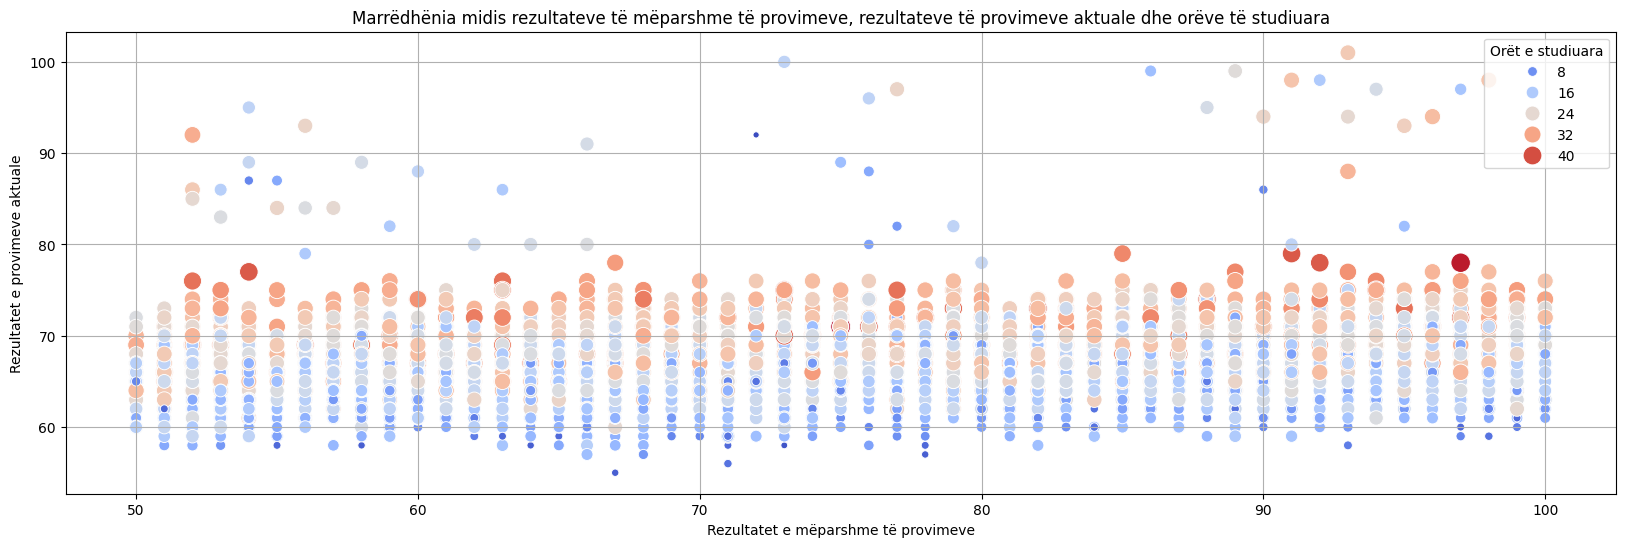

In [12]:
# Vizualizimi i marrëdhënies midis Previous Scores, Exam Score dhe Hours Studied pa mostrim

plt.figure(figsize=(20, 6))
scatter = sns.scatterplot(data=pre_df, x='Previous_Scores', y='Exam_Score', hue='Hours_Studied', palette='coolwarm', size='Hours_Studied', sizes=(20, 200))
plt.title('Marrëdhënia midis rezultateve të mëparshme të provimeve, rezultateve të provimeve aktuale dhe orëve të studiuara')
plt.xlabel('Rezultatet e mëparshme të provimeve')
plt.ylabel('Rezultatet e provimeve aktuale')
plt.legend(title='Orët e studiuara')
plt.grid(True)
plt.show()

In [13]:
# Selektimi i rreshtave të datasetit për mostrim
# sample_df = pre_df.sample(n=500)
sample_df = pre_df.sample(frac=0.1, random_state=1) 
# 10% e datasetit për mostër farc = 0.1 (rangu duhet të jetë mes 0 dhe 1) 
# random state = 1 sepse e njejta mostër e rastësishme gjenerohet çdo herë kur ekzekutohet kodi.
# Nëse random_state nuk është përcaktuar, çdo herë që ekzekutohet kodi do të rezultojë në një mostrë ndoshta të ndryshme.

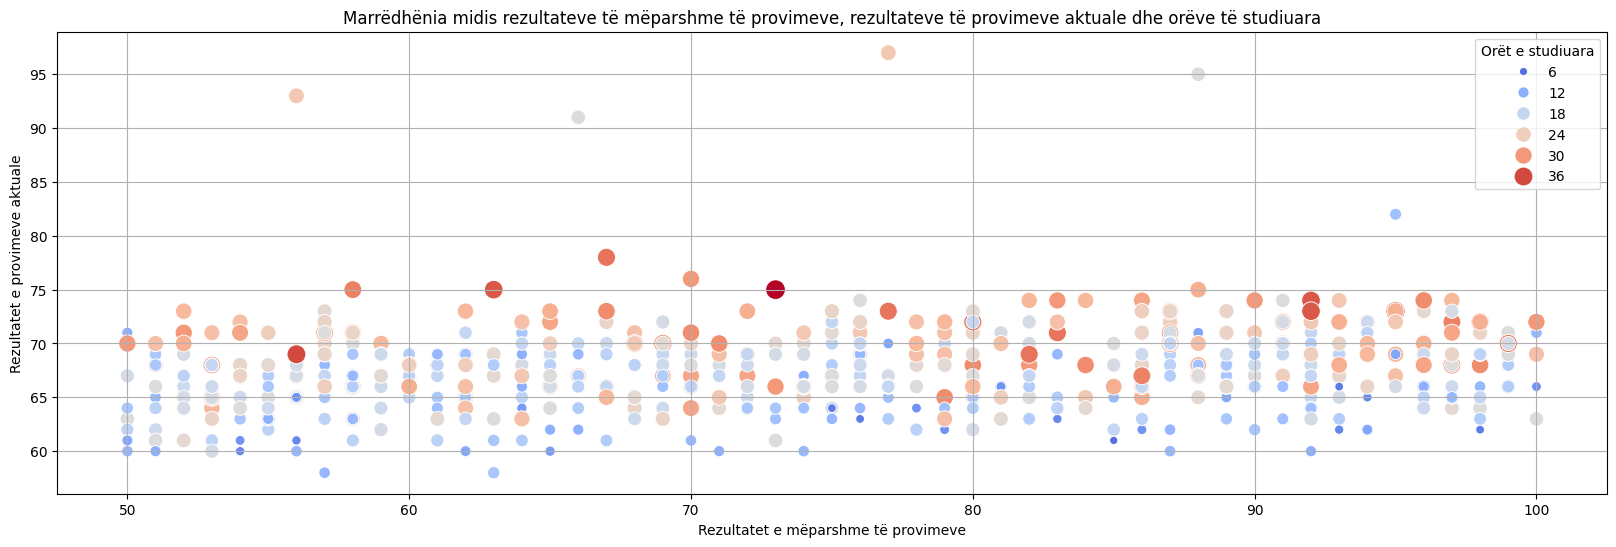

In [14]:
# Vizualizimi i marrëdhënies midis Previous Scores, Exam Score dhe Hours Studied me mostrim
plt.figure(figsize=(20, 6))
scatter = sns.scatterplot(data=sample_df, x='Previous_Scores', y='Exam_Score', hue='Hours_Studied', palette='coolwarm', size='Hours_Studied', sizes=(20, 200))
plt.title('Marrëdhënia midis rezultateve të mëparshme të provimeve, rezultateve të provimeve aktuale dhe orëve të studiuara')
plt.xlabel('Rezultatet e mëparshme të provimeve')
plt.ylabel('Rezultatet e provimeve aktuale')
plt.legend(title='Orët e studiuara')
plt.grid(True)
plt.show()

C:\Users\lirim\AppData\Local\Temp\ipykernel_5100\1428233615.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_exam_scores = sample_df.groupby('study_quantile')['Exam_Score'].mean().reset_index(name='Average_Exam_Score')


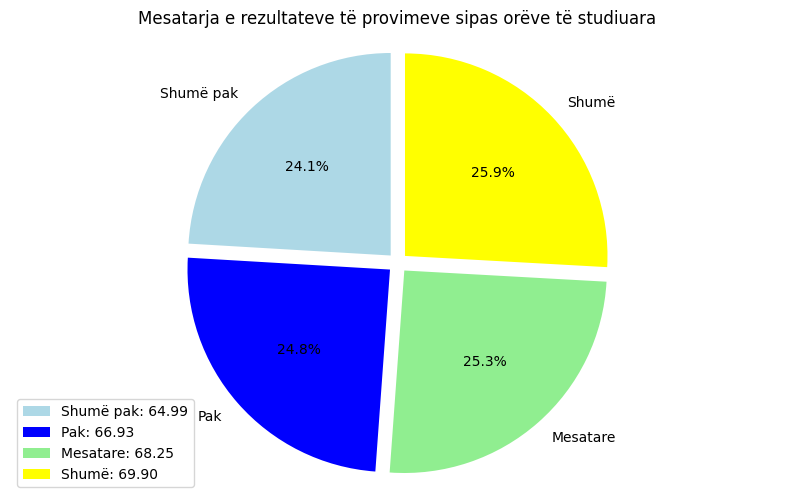

In [15]:
# Ndarja e orëve të studiuara në kuantilë
sample_df['study_quantile'] = pd.qcut(sample_df['Hours_Studied'], 4, labels=['Shumë pak', 'Pak', 'Mesatare', 'Shumë'])

# Llogaritja e mesatares së rezultateve të provimeve për secilin grup të orëve të studiuara
study_exam_scores = sample_df.groupby('study_quantile')['Exam_Score'].mean().reset_index(name='Average_Exam_Score')
sorted_scores = study_exam_scores.sort_values(by='Average_Exam_Score', ascending=True)

# Llogaritja e përqindjeve për diagram
total_scores = sorted_scores['Average_Exam_Score'].sum()
sizes = sorted_scores['Average_Exam_Score'] / total_scores * 100

# Përdorimi i një diagrami të ngjyrave për grupe të ndryshme të orëve të studiuara
colors = ['lightblue', 'blue', 'lightgreen', 'yellow']

# Vizatimi i grafikut të pie
plt.figure(figsize=(10, 6))
labels = sorted_scores['study_quantile']
explode = [0.05] * len(labels)  # Ndajmë çdo segment pak nga qendra

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Mesatarja e rezultateve të provimeve sipas orëve të studiuara')
plt.axis('equal')
plt.legend(labels=[f'{level}: {score:.2f}' for level, score in zip(labels, sorted_scores['Average_Exam_Score'])], loc="best")
plt.show()

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }

    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Reduktimi i dimensionalitetit</h3>
<p>Reduktimi i dimensionalitetit është një proces në analizën e të dhënave që përfshin zvogëlimin e numrit të variablave të përdorura në një dataset. Qëllimi është të largohen veçoritë e tepërta ose të pakorrelacionuara pa humbur informacione esenciale.</p>

In [16]:
# Kontrollojmë strukturën aktuale të DataFrame
print("Struktura origjinale e DataFrame:")
display(pre_df.head())

# Kontrollojmë strukturën pas heqjes së kolonës
print("Struktura e re e datasetit pas heqjes së kolonës 'Access_to_Resources':")

# Heqja e kolonës 'Access_To_Resources'
if 'Access_to_Resources' in pre_df.columns:
    pre_df = pre_df.drop('Access_to_Resources', axis=1)
    pre_df.to_csv("../dataset/StudentPerformanceFactors_new.csv", index=False)
display(pre_df.head())

Struktura origjinale e DataFrame:


,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Struktura e re e datasetit pas heqjes së kolonës 'Access_to_Resources':


,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }

    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Zgjedhja e nën-bashkësise të vetive</h3>

<p>Duke përdorur datasetin e ri të gjeneruar, fillojmë me përcaktimin e vetive më të rëndësishme për analizë, duke u fokusuar në ato që janë të lidhura ngushtë me <b>Exam_Score</b>.</p>

In [17]:
# Zgjedhja e nënbashkësise të vetive
features_selected = [
    'Hours_Studied', 
    'Attendance', 
    'Parental_Involvement', 
    # 'Access_to_Resources',
    'Extracurricular_Activities', 
    'Sleep_Hours', 
    'Previous_Scores', 
    'Motivation_Level', 
    'Internet_Access', 
    'Tutoring_Sessions', 
    'Family_Income', 
    'Teacher_Quality', 
    'Peer_Influence', 
    'Physical_Activity', 
    'Gender'
]

# Krijojmë një dataframe të ri me vetitë e zgjedhura
df_selected_features = pre_df[features_selected + ['Exam_Score']]

# Shfaqim disa rreshta nga dataframe-i i ri
print("Dataframe me vetitë e zgjedhura:")
display(df_selected_features)

# subset_conditional_df = pre_df[(pre_df['School_Type'] == 'Public') & (pre_df['Parental_Involvement'] == 'High')]
# print(subset_conditional_df.head()) 

Dataframe me vetitë e zgjedhura:


,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Gender,Exam_Score
0,23,84,Low,No,7,73,Low,Yes,0,Low,Medium,Positive,3,Male,67
1,19,64,Low,No,8,59,Low,Yes,2,Medium,Medium,Negative,4,Female,61
2,24,98,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Neutral,4,Male,74
3,29,89,Low,Yes,8,98,Medium,Yes,1,Medium,Medium,Negative,4,Male,71
4,19,92,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Neutral,4,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,No,7,76,Medium,Yes,1,High,Medium,Positive,2,Female,68
6603,23,76,High,No,8,81,Medium,Yes,3,Low,High,Positive,2,Female,69
6604,20,90,Medium,Yes,6,65,Low,Yes,3,Low,Medium,Negative,2,Female,68
6605,10,86,High,Yes,6,91,High,Yes,2,Low,Medium,Positive,3,Female,68


<style>
    h4 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }

    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>

<h4>Krijimi i vetive të reja</h4>

<p>Një prej vetive të cilat do të krijojmë është <b>Study_Rating</b> e cila është një prodhim i <b>Hours_Studied</b> dhe <b>Prevous_Scores</b>. Ky atribut do të ndihmoj për të kuptuar se sa efektive janë order e studimit në lidhje me rezultatet e meparshme.</p>

In [18]:
# Krijimi i vetive të reja
df_selected_features['Study_Rating'] = (df_selected_features['Hours_Studied'] * df_selected_features['Previous_Scores'] / 3000) * 100 # Maksimumi 30 orë * 100 pikë = 3000
df_selected_features['Study_Rating'] = df_selected_features['Study_Rating'].apply(lambda x: f"{round(x, 2)}%")

# Shfaqim disa rreshta nga dataframe-i për të kontrolluar Study_Rating
print("Dataframe pas krijimit të Study_Rating:")
display(df_selected_features[['Hours_Studied', 'Previous_Scores', 'Study_Rating']].head())

Dataframe pas krijimit të Study_Rating:


C:\Users\lirim\AppData\Local\Temp\ipykernel_5100\1386634999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['Study_Rating'] = (df_selected_features['Hours_Studied'] * df_selected_features['Previous_Scores'] / 3000) * 100 # Maksimumi 30 orë * 100 pikë = 3000
C:\Users\lirim\AppData\Local\Temp\ipykernel_5100\1386634999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['Study_Rating'] = df_selected_features['Study_Rating'].apply(lambda x: f"{round(x, 2)}%")


,Hours_Studied,Previous_Scores,Study_Rating
0,23,73,55.97%
1,19,59,37.37%
2,24,91,72.8%
3,29,98,94.73%
4,19,65,41.17%


<style>
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<p>Një tjetër veti e re do të jetë <b>Activity_Score</b> e cila është një shprehje për të kombinuar disa aktivitete fizike dhe jashtë shkollore. Përdorim <b>Physical_Activity</b> dhe <b>Extracurricular_Activity</b> për të krijuar këtë veti.

In [19]:
# Krijimi i Activity_Score bazuar në aktivitetet fizike dhe jashtë shkollore
df_selected_features.loc[:, 'Activity_Score'] = df_selected_features['Physical_Activity'] + df_selected_features['Extracurricular_Activities'].apply(lambda x: 1 if x == 'Yes' else 0)

# Shfaqim disa rreshta nga dataframe-i për të kontrolluar Activity_Score
print("Dataframe pas krijimit të Activity_Score:")
display(df_selected_features[['Physical_Activity', 'Extracurricular_Activities', 'Activity_Score']].head())

Dataframe pas krijimit të Activity_Score:


C:\Users\lirim\AppData\Local\Temp\ipykernel_5100\2572682965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features.loc[:, 'Activity_Score'] = df_selected_features['Physical_Activity'] + df_selected_features['Extracurricular_Activities'].apply(lambda x: 1 if x == 'Yes' else 0)


,Physical_Activity,Extracurricular_Activities,Activity_Score
0,3,No,3
1,4,No,4
2,4,Yes,5
3,4,Yes,5
4,4,Yes,5


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }

    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>

<h3>Binarizimi i Sleep_Hours</h3>

<p>Krijojmë vetinë e cila tregon nëse një student ka më shumë se 7 ore gjumë, duke e binarizuar atë. Kjo mund të ndihmoj për të kuptuar ndikimin e gjumit/pushimit në performancën akademike.</p>

In [20]:
# Krijimi i dataframe-it të ri me një kopje
df_selected_features = pre_df[features_selected + ['Exam_Score']].copy()

# Binarizimi i Sleep_Hours: 0 për më pak se 7 orë, 1 për 7 orë ose më shumë
df_selected_features.loc[:, 'Sleep_Binary'] = df_selected_features['Sleep_Hours'].apply(lambda x: 1 if x >= 7 else 0)

# Shfaqim disa rreshta nga dataframe-i për të kontrolluar Sleep_Binary
print("Dataframe pas binarizimit të Sleep_Hours:")
display(df_selected_features[['Sleep_Hours', 'Sleep_Binary']].head())


Dataframe pas binarizimit të Sleep_Hours:


,Sleep_Hours,Sleep_Binary
0,7,1
1,8,1
2,7,1
3,8,1
4,6,0


<style>
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<p>Krijojmë vetinë <b>Family_Income</b> duke bërë binarizimin për të krijuar një veti që tregon nëse të ardhurat e familjes janë të larta ose të ulta. Kjo mund të bëhet duke klasifikuar <b>Family_Income</b> nëpër disa kategori <b>low, medium, high.</b>

In [21]:
# Binarizimi i Family_Income: 0 për "Low", 1 për "Medium" dhe "High"
df_selected_features.loc[:, 'Income_Binary'] = df_selected_features['Family_Income'].apply(lambda x: 1 if x in ['Medium', 'High'] else 0)

# Shfaqim disa rreshta nga dataframe-i për të kontrolluar Income_Binary
print("Dataframe pas binarizimit të Family_Income:")
display(df_selected_features[['Family_Income', 'Income_Binary']].head())


Dataframe pas binarizimit të Family_Income:


,Family_Income,Income_Binary
0,Low,0
1,Medium,1
2,Medium,1
3,Medium,1
4,Medium,1


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Kontrollimi i të dhënave të reja</h3>

In [22]:
# Shikoni strukturën e re të dataframe-it
print("Dataframe pas krijimit të vetive të reja:")
display(df_selected_features.head())

Dataframe pas krijimit të vetive të reja:


,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Gender,Exam_Score,Sleep_Binary,Income_Binary
0,23,84,Low,No,7,73,Low,Yes,0,Low,Medium,Positive,3,Male,67,1,0
1,19,64,Low,No,8,59,Low,Yes,2,Medium,Medium,Negative,4,Female,61,1,1
2,24,98,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Neutral,4,Male,74,1,1
3,29,89,Low,Yes,8,98,Medium,Yes,1,Medium,Medium,Negative,4,Male,71,1,1
4,19,92,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Neutral,4,Female,70,0,1


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Normalizimi</h3>

In [23]:
# Definimi i kolonave numerike
# numerical_columns = pre_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Inicializimi StandardScaler me vlerat [0, 1]
# scaler = StandardScaler()

# Normalizojmë kolonat numerike
# pre_df[numerical_columns] = scaler.fit_transform(pre_df[numerical_columns])

# Shfaqim disa rreshta nga dataframe pas normalizimit
# print("Dataframe pas normalizimit të kolonave numerike:")
# display(pre_df[numerical_columns].head())

# -------------------------------------------------------------------------------------

# Definimi i MinMaxScaler me kufijtë 1 dhe 10
scaler = MinMaxScaler(feature_range=(1, 10))

# Zgjedhja e kolonave numerike
numerical_columns = pre_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Aplikimi i MinMaxScaler për kolonat numerike
pre_df[numerical_columns] = scaler.fit_transform(pre_df[numerical_columns])
pre_df[numerical_columns] = pre_df[numerical_columns].round(2)

# Shfaqim disa rreshta nga dataframe pas normalizimit
print("Dataframe pas normalizimit të kolonave numerike: ")
display(pre_df[numerical_columns].head())


Dataframe pas normalizimit të kolonave numerike: 


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,5.60,6.40,5.5,5.14,1.00,5.5,3.35
1,4.77,1.90,7.0,2.62,3.25,7.0,2.17
2,5.81,9.55,5.5,8.38,3.25,7.0,4.72
3,6.86,7.53,7.0,9.64,2.12,7.0,4.13
4,4.77,8.20,4.0,3.70,4.38,7.0,3.93


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>

<h3>Diskretizimi</h3>

In [24]:
df_selected_features = df_selected_features.copy()

# Diskretizimi i Hours_Studied në grupe
bins_hours_studied = [0, 10, 20, 30]
labels_hours_studied = ['Low', 'Medium', 'High']
df_selected_features['Hours_Studied_Binned'] = pd.cut(
    df_selected_features['Hours_Studied'],
    bins=bins_hours_studied,
    labels=labels_hours_studied,
    right=False
)

# Diskretizimi i Sleep_Hours në grupe
bins_sleep_hours = [0, 6, 7, 8, 10]
labels_sleep_hours = ['Very Low', 'Low', 'Adequate', 'High']
df_selected_features['Sleep_Hours_Binned'] = pd.cut(
    df_selected_features['Sleep_Hours'],
    bins=bins_sleep_hours,
    labels=labels_sleep_hours,
    right=False
)

# Diskretizimi i Previous_Scores në grupe
bins_previous_scores = [0, 60, 75, 90, 100]
labels_previous_scores = ['Low', 'Medium', 'High', 'Very High']
df_selected_features['Previous_Scores_Binned'] = pd.cut(
    df_selected_features['Previous_Scores'],
    bins=bins_previous_scores,
    labels=labels_previous_scores,
    right=False
)

# Shfaqim dataframe-in e azhurnuar me grupe të reja
print("Dataframe pas diskretizimit:")
display(df_selected_features[['Hours_Studied', 'Hours_Studied_Binned', 'Sleep_Hours', 'Sleep_Hours_Binned', 'Previous_Scores', 'Previous_Scores_Binned']].head())

Dataframe pas diskretizimit:


,Hours_Studied,Hours_Studied_Binned,Sleep_Hours,Sleep_Hours_Binned,Previous_Scores,Previous_Scores_Binned
0,23,High,7,Adequate,73,Medium
1,19,Medium,8,High,59,Low
2,24,High,7,Adequate,91,Very High
3,29,High,8,High,98,Very High
4,19,Medium,6,Low,65,Medium


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>

<h3>Transformimi</h3>

In [25]:
# Krijojmë variabla binare për kategoritë e zgjedhura 
df_transformed = pd.get_dummies(df_selected_features, columns=['Gender', 'Parental_Involvement', 'Motivation_Level', 'Internet_Access', 'Teacher_Quality', 'Peer_Influence', 'Family_Income', 'Hours_Studied_Binned', 'Sleep_Hours_Binned', 'Previous_Scores_Binned'])

# Shfaqim dataframe të transformuar
print("Dataframe pas transformimit:")
display(df_transformed.head())  

Dataframe pas transformimit:


,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Sleep_Binary,Income_Binary,...,Hours_Studied_Binned_Medium,Hours_Studied_Binned_High,Sleep_Hours_Binned_Very Low,Sleep_Hours_Binned_Low,Sleep_Hours_Binned_Adequate,Sleep_Hours_Binned_High,Previous_Scores_Binned_Low,Previous_Scores_Binned_Medium,Previous_Scores_Binned_High,Previous_Scores_Binned_Very High
0,23,84,No,7,73,0,3,67,1,0,...,False,True,False,False,True,False,False,True,False,False
1,19,64,No,8,59,2,4,61,1,1,...,True,False,False,False,False,True,True,False,False,False
2,24,98,Yes,7,91,2,4,74,1,1,...,False,True,False,False,True,False,False,False,False,True
3,29,89,Yes,8,98,1,4,71,1,1,...,False,True,False,False,False,True,False,False,False,True
4,19,92,Yes,6,65,3,4,70,0,1,...,True,False,False,True,False,False,False,True,False,False


<style>
    h2 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 20px;
    }
</style>

<h2>2. FAZA E DYTË</h2>

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Detektimi dhe pastrimi i outliers me metodën Z-Score</h3>
<p>Outliers janë vlera që dallojnë ndjeshëm nga shumica e të dhënave në një dataset. Ato mund të jenë gabime ose vlera të rralla, dhe mund të ndikojnë negativisht në analizën statistike ose trajnimin e modeleve. Z-Score (ose standard score) është një masë statistikore që tregon sa larg është një vlerë nga mesatarja, duke përdorur devijimin standard si njësi. 
</p>

Numri i outliers që janë identifikuar: 101


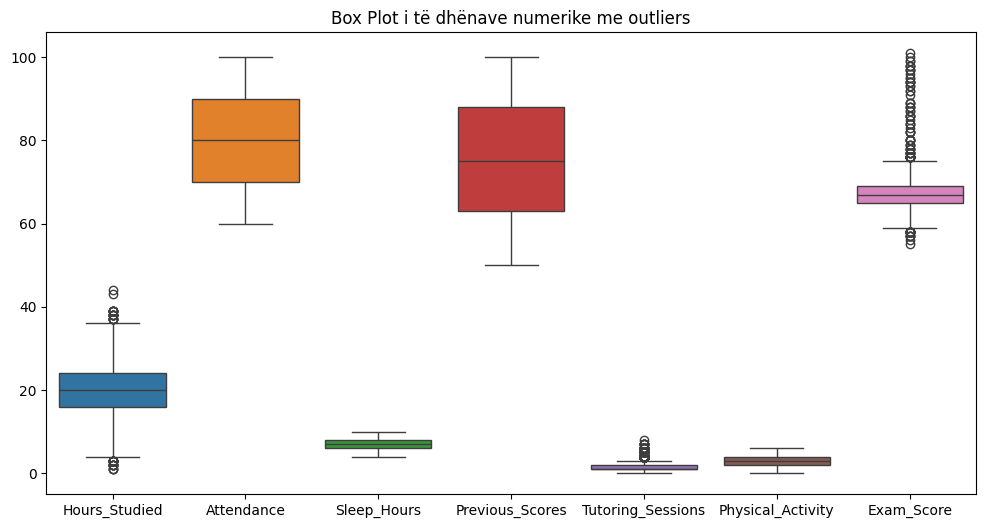

In [26]:
# Zgjedh vetëm kolonat numerike për zbulimin e outliers
numerical_data = main_df.select_dtypes(include=['int64', 'float64'])

# Llogarit Z-Score
z_scores = np.abs(zscore(numerical_data))
threshold = 3  # Kufiri bazë për zbulimin e outliers

# Identifikon rreshtat me Z-Score më të madhe se kufiri
outliers = (z_scores > threshold).any(axis=1)

# Numëron sa outliers u identifikuan
num_outliers = outliers.sum()
print(f"Numri i outliers që janë identifikuar: {num_outliers}")

# Eleminon outliers nga dataseti origjinal
pre_df = main_df[~outliers]

# Visualizimi i shpërndarjes së të dhënave numerike dhe identifikimi i outliers me anë të Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_data)
plt.title('Box Plot i të dhënave numerike me outliers')
plt.show()

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Identifikimi i outliers me DBSCAN Clustering</h3>

<style>
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<p><b>DBSCAN (Density-Based Spatial Clustering of Applications with Noise)</b> është një algoritëm klasterizimi i bazuar në dendësi, i cili mund të përdoret për të identifikuar outliers si pjesë e procesit të tij. Në vend që të përdorë distancat absolute ose statistikat si Z-score, DBSCAN identifikon outliers duke analizuar dendësinë e të dhënave.</p>

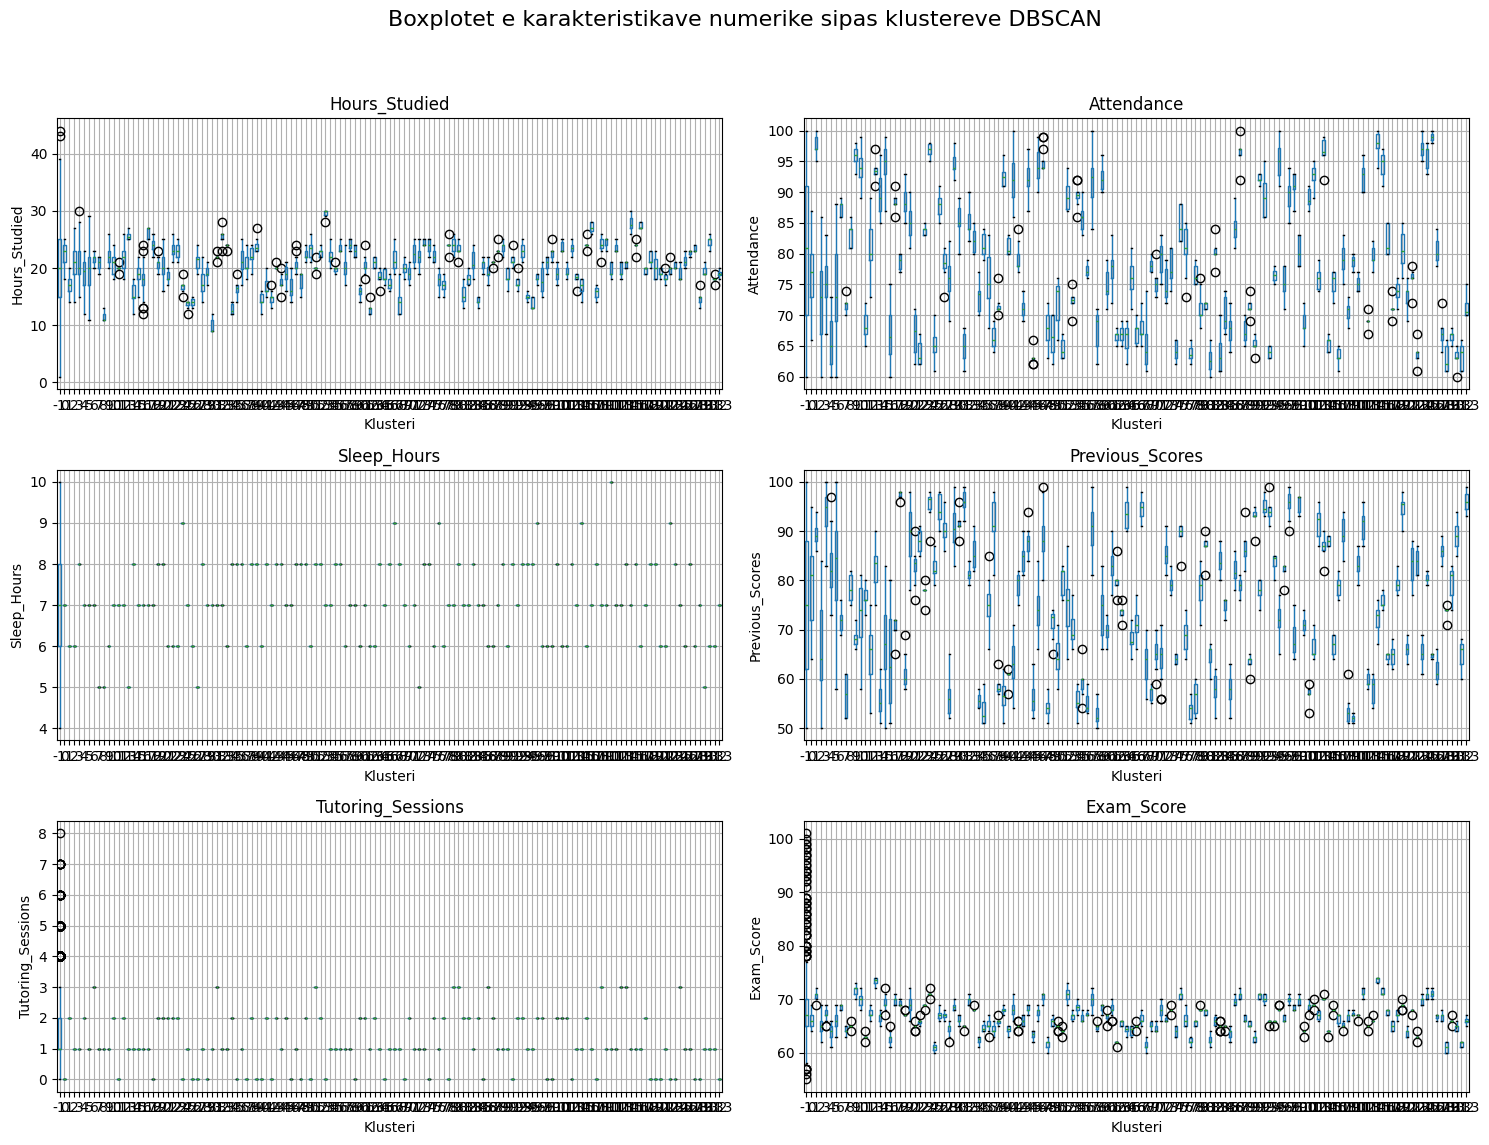

In [38]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd

# Zgjedhim kolonat numerike
numerical_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']
data_numerical = main_df[numerical_columns]

# Standardizojmë të dhënat për performancë më të mirë të DBSCAN
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Vendosim parametrat e DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Aplikojmë DBSCAN për të krijuar grupime
clusters = dbscan.fit_predict(data_scaled)

# Shtojmë grupet tek dataframe origjinale për vizualizim më të mirë
main_df['Cluster'] = clusters

# Krijimi i boxplot për çdo kolonë numerike të grupuar sipas klustereve
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

for ax, column in zip(axes.flatten(), numerical_columns):
    main_df.boxplot(column=column, by='Cluster', ax=ax)
    ax.get_figure().suptitle('Boxplotet e karakteristikave numerike sipas klustereve DBSCAN', fontsize=16)
    ax.set_title(column)
    ax.set_xlabel('Klusteri')
    ax.set_ylabel(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Identifikimi i outliers me KMeans Clustering</h3>
<p><b>KMeans</b> është një algoritëm i thjeshtë dhe efektiv (unsupervised learning) që ndan një sasi të dhënash në një numër të caktuar paraprakisht të klustereve (grupeve). Qëllimi i algoritmit është të grupojë pikat e të dhënave në mënyrë që brenda një grupi pikat të jenë sa më të ngjashme me njëra-tjetrën, dhe ndërmjet grupeve të ndryshme të jenë sa më të ndryshme.</p>

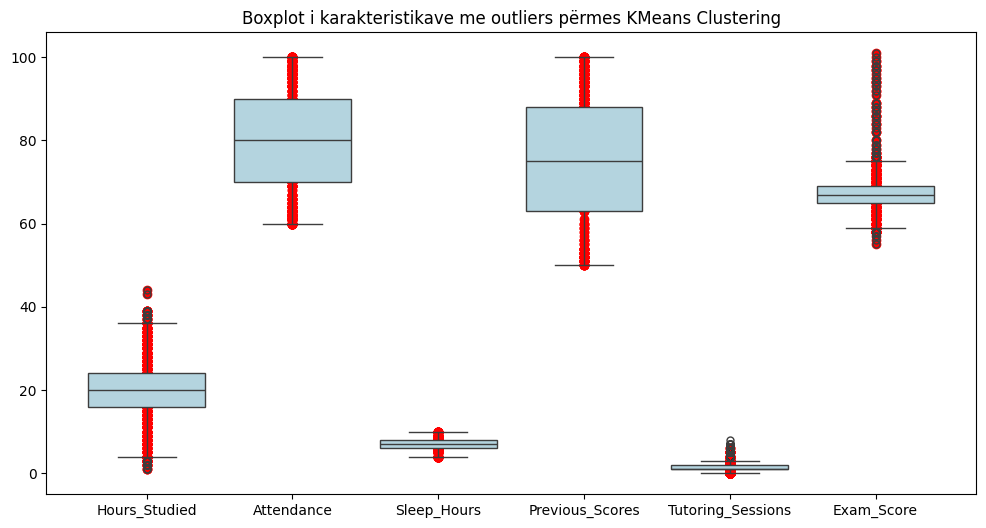

In [42]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Zgjidhim kolonat numerike për analizë
features = main_df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']]

# Trajnojmë modelin KMeans me një numër të përcaktuar të klustereve
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

# Llogaritim distancat nga qendrat e klustereve për çdo pikë
distances = kmeans.transform(features)
min_distance = np.min(distances, axis=1)

# Vendosim një prag për të identifikuar outliers
threshold = np.percentile(min_distance, 90)  # Pikat me 10% të distancave më të larta konsiderohen outliers
main_df['Outlier'] = min_distance > threshold

# Vizualizojmë me boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=features, color='lightblue', fliersize=5)

# Shtojmë pikat e outliers në boxplot si pikat e kuqe
outliers_data = features[main_df['Outlier']]
for i, column in enumerate(features.columns):
    plt.scatter([i]*len(outliers_data[column]), outliers_data[column], color='red')

plt.xticks(ticks=np.arange(len(features.columns)), labels=features.columns)
plt.title('Boxplot i karakteristikave me outliers përmes KMeans Clustering')
plt.show()


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Detektimi dhe pastrimi nga noisy data</h3>

In [ ]:
# Zgjedhja e kolonave numerike
numerical_columns = pre_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Llogaritja e Z-Score për çdo kolonë numerike për detektimin e noisy data
z_scores = np.abs(stats.zscore(pre_df[numerical_columns]))

# Vendosim pragun për të definuar se çfarë konsiderohet noisy (p.sh., Z-Score më i madh se 3)
threshold = 3
noisy_data_mask = (z_scores > threshold)

# Kontrollo dhe shfaq rreshtat që kanë vlera noisy
noisy_rows = pre_df[noisy_data_mask.any(axis=1)]
print(f"Numri i rreshtave me të dhëna noisy: {len(noisy_rows)}")
display(noisy_rows)

# Heqim rreshtat që kanë vlera noisy
pre_df_cleaned = pre_df[~noisy_data_mask.any(axis=1)]

# Shfaqim dataset-in e pastruar
print("Dataframe pas eliminimit të noisy data:")
display(pre_df_cleaned.head())

<style>
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
Në këtë fazë, do të përqendrohemi në detektimin e përjashtuesve për të identifikuar dhe përjashtuar të dhënat që devijojnë dhe mund të ndikojnë në analizën e këtij dataseti. Gjithashtu, do të mënjanojmë zbulimet jo të sakta për të ruajtur cilësinë e të dhënave dhe saktësinë e rezultateve. Eksplorimi i të dhënave do të përfshijë statistika përmbledhëse dhe analiza të ndryshme për të nxjerrë njohuri kyçe mbi strukturën e datasetit.

<Figure size 1200x800 with 0 Axes>

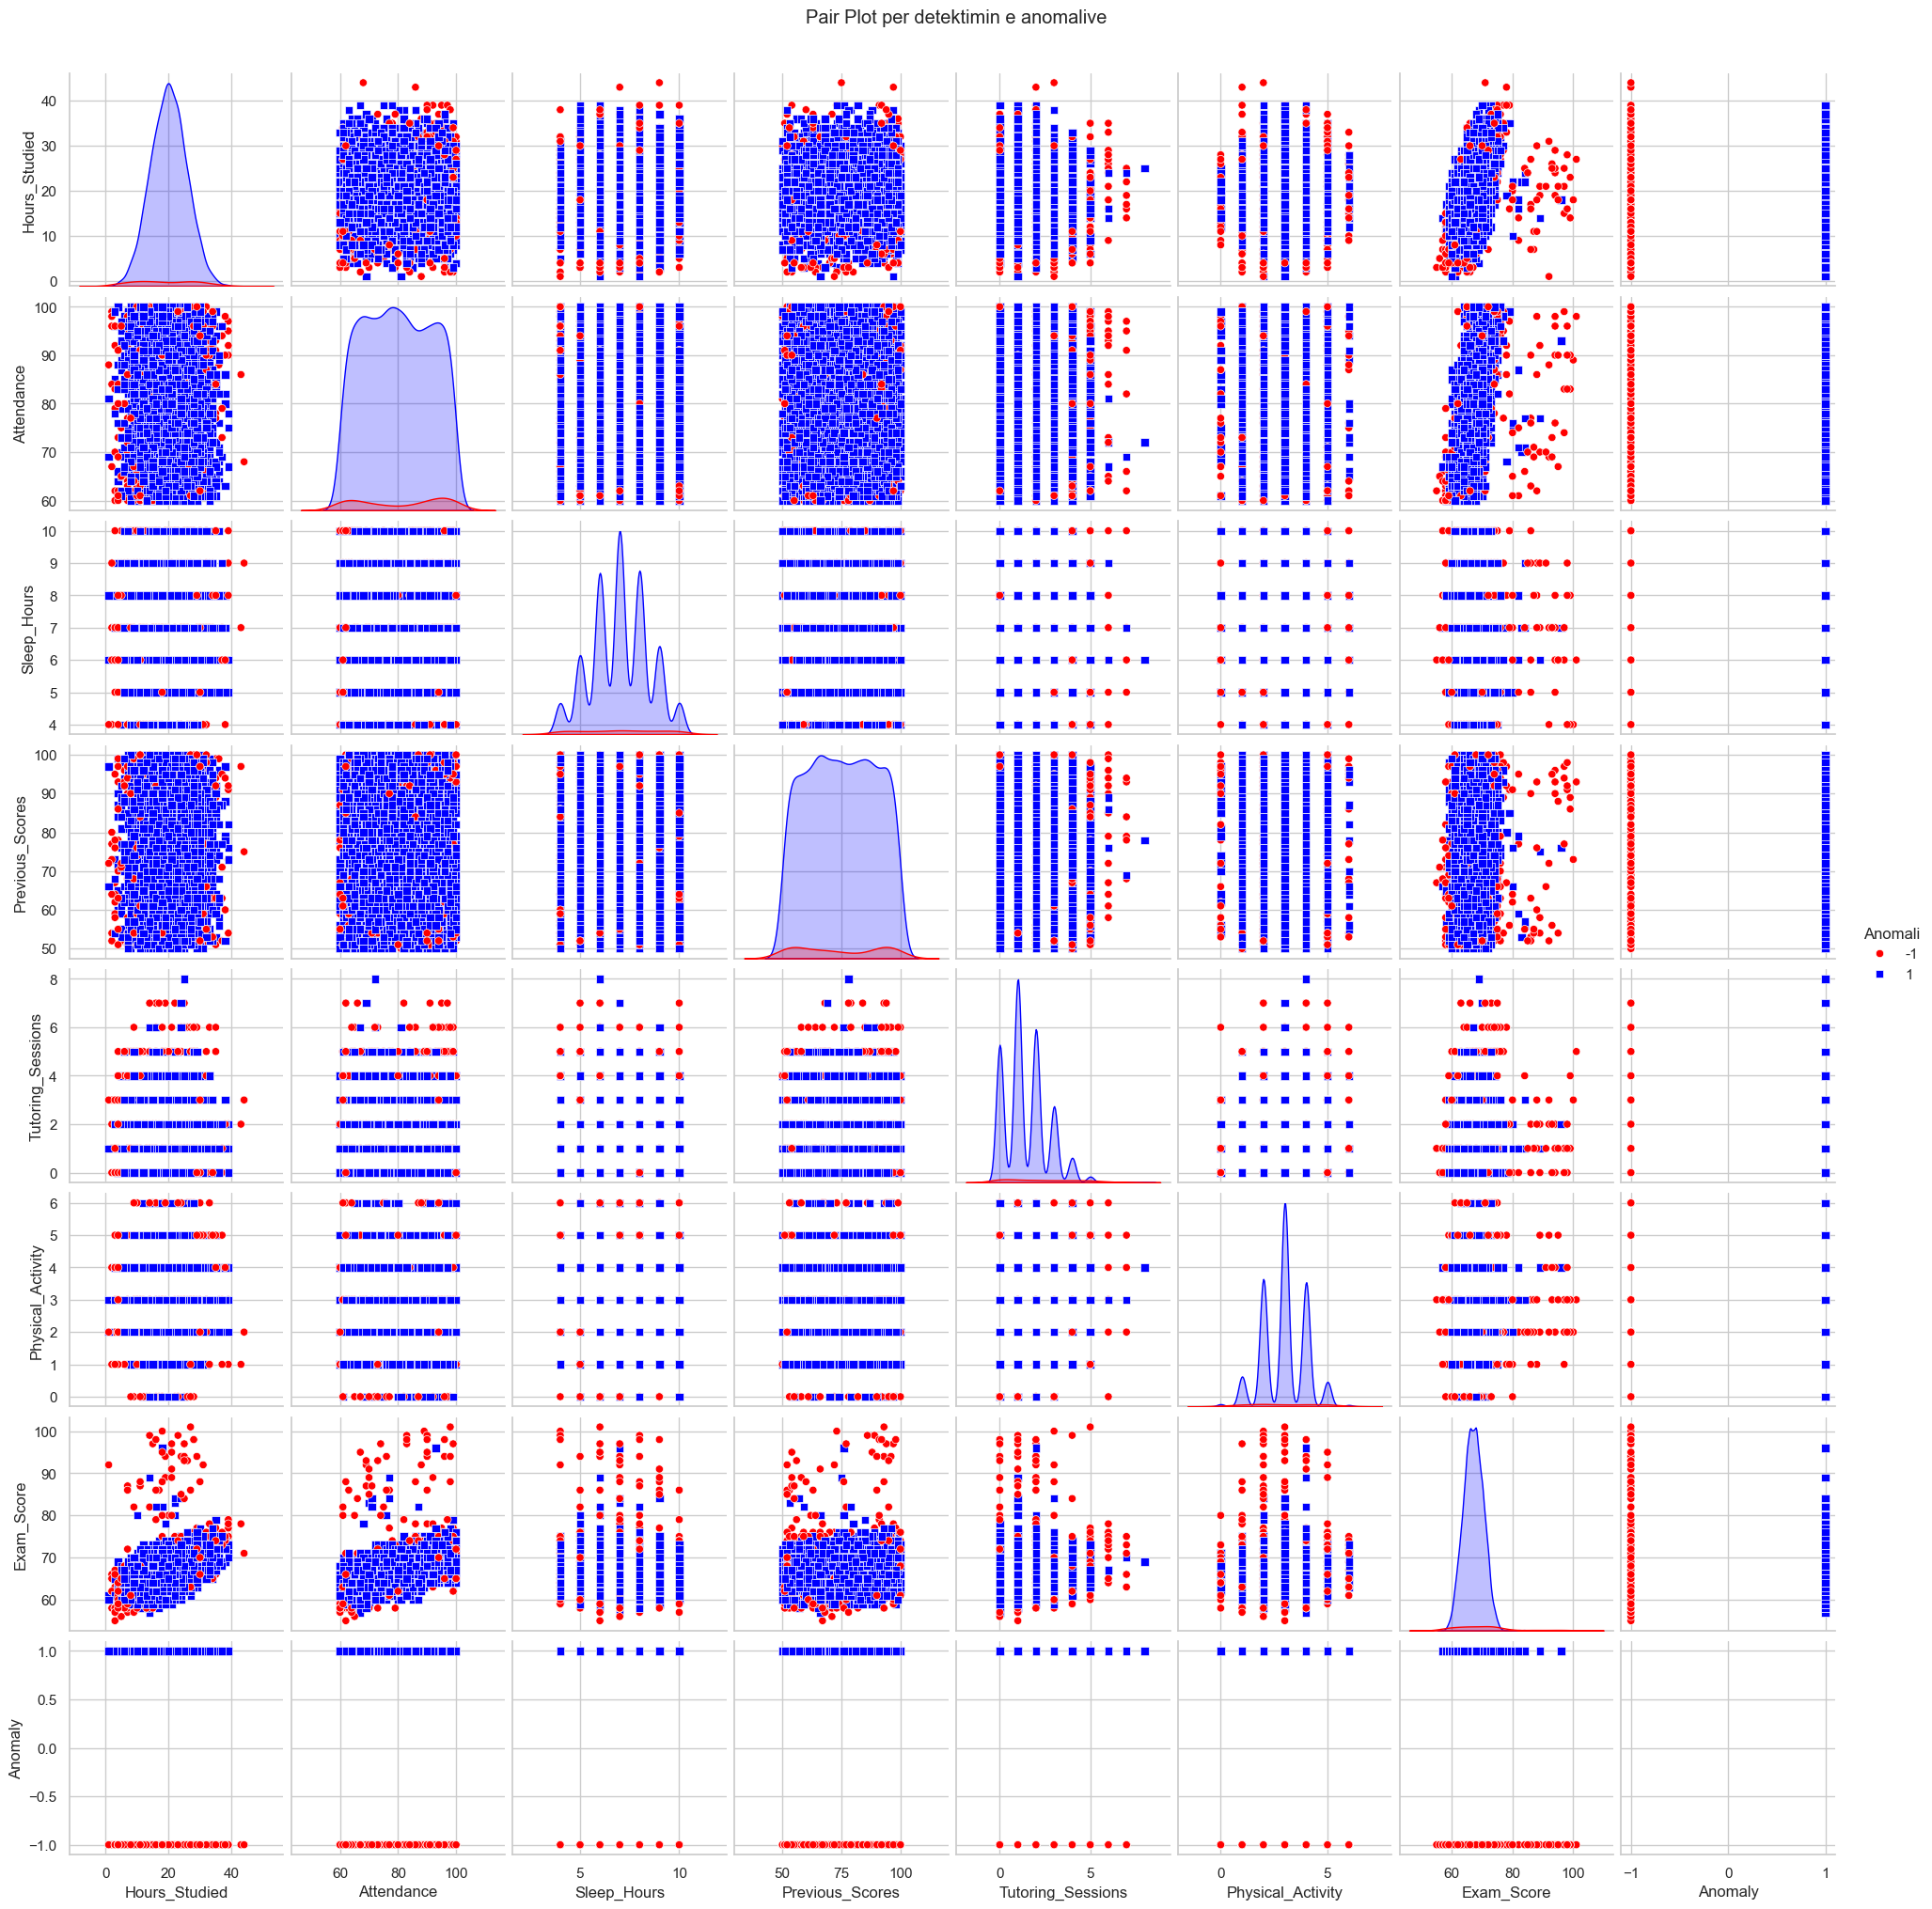

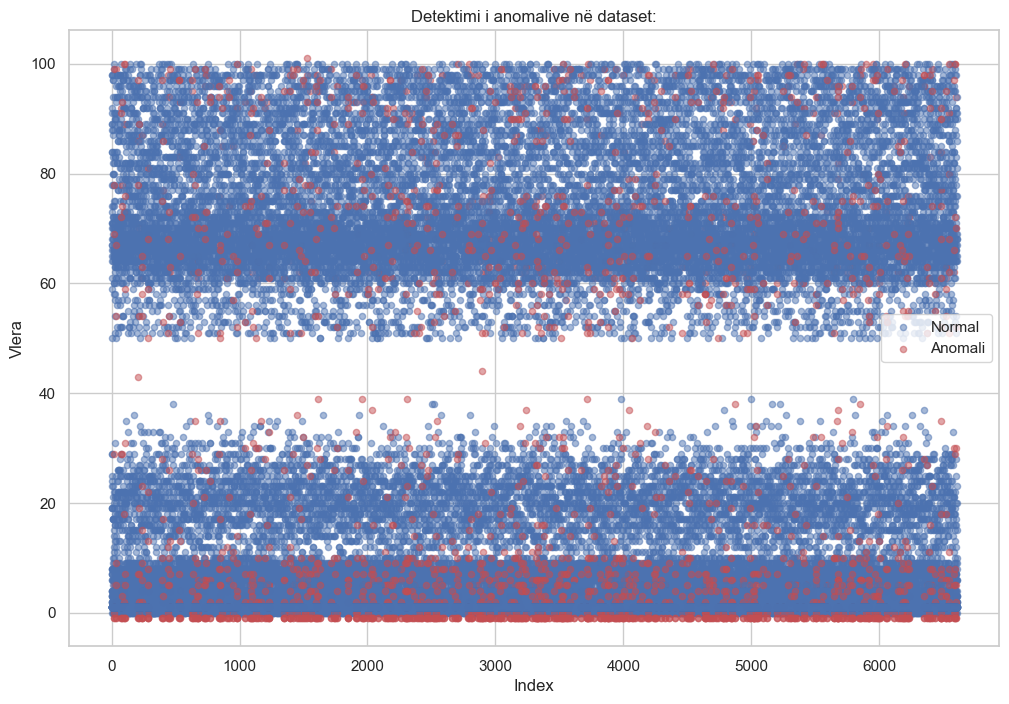

In [24]:
# Zgjidhen vetëm kolonat numerike nga dataseti
numeric_columns = pre_df.select_dtypes(include=['float64', 'int64']).columns
numeric_data = pre_df[numeric_columns]

# Inicializimi i Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
pre_df['Anomali'] = iso_forest.fit_predict(numeric_data)

# Ndarja e anomalive dhe i të dhënave normale për vizualizim
normal_data = pre_df[pre_df['Anomali'] == 1]
anomalies = pre_df[pre_df['Anomali'] == -1]

sns.set_theme(style='whitegrid')

# Vizualizimi i Pair Plot
plt.figure(figsize=(12, 8))
sns.pairplot(pre_df, hue='Anomali', palette={1: 'blue', -1: 'red'}, diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pair Plot per detektimin e anomalive', y=1.02)
plt.show()

# Vizualizimi shtesë i scatter plot për secilën kolone
plt.figure(figsize=(12, 8))
for col in numeric_columns:
    plt.scatter(normal_data.index, normal_data[col], label='Normal', color='b', alpha=0.5, s=20)
    plt.scatter(anomalies.index, anomalies[col], label='Anomali', color='r', alpha=0.5, s=20)

plt.legend(['Normal', 'Anomali'])
plt.title('Detektimi i anomalive në dataset:')
plt.xlabel('Index')
plt.ylabel('Vlera')
plt.show()


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>

<h3>Ngjashmëritë e të dhënave</h3>

<p>Analiza e ngjashmërive të të dhënave përfshin krahasimin e vlerave brenda dataset-it për të identifikuar modele, grupe të ngjashme ose tipare të përbashkëta. Kjo analizë përdoret për të zbuluar marrëdhënie të fshehura midis elementëve të ndryshëm të dataset-it, duke u bazuar në karakteristikat e tyre numerike ose kategorike.</p>

Matrica e korrelacionit:


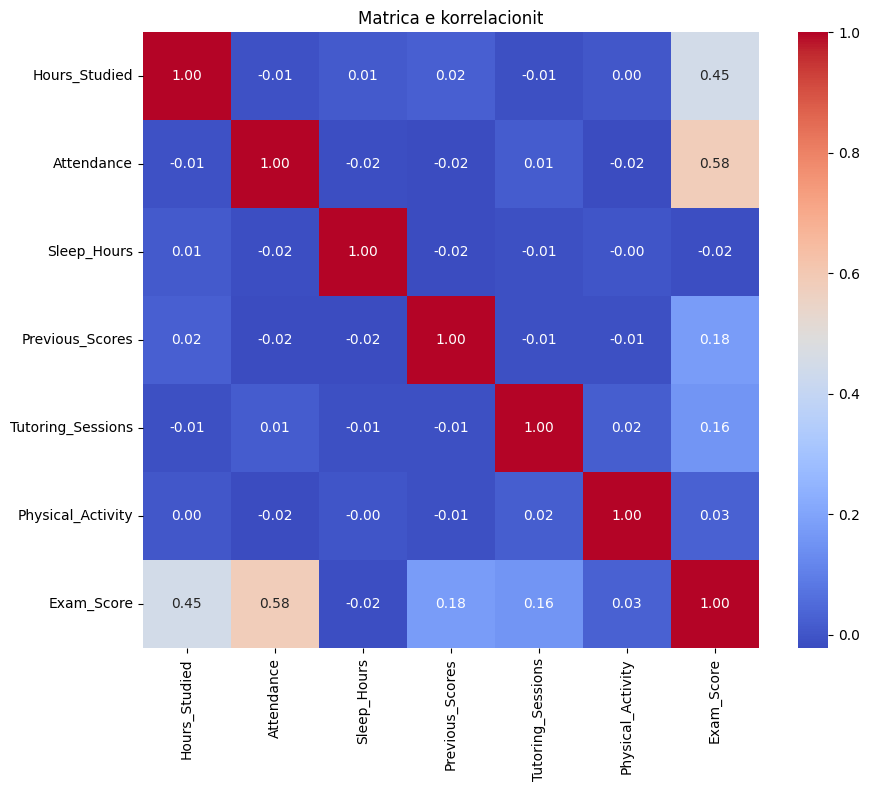

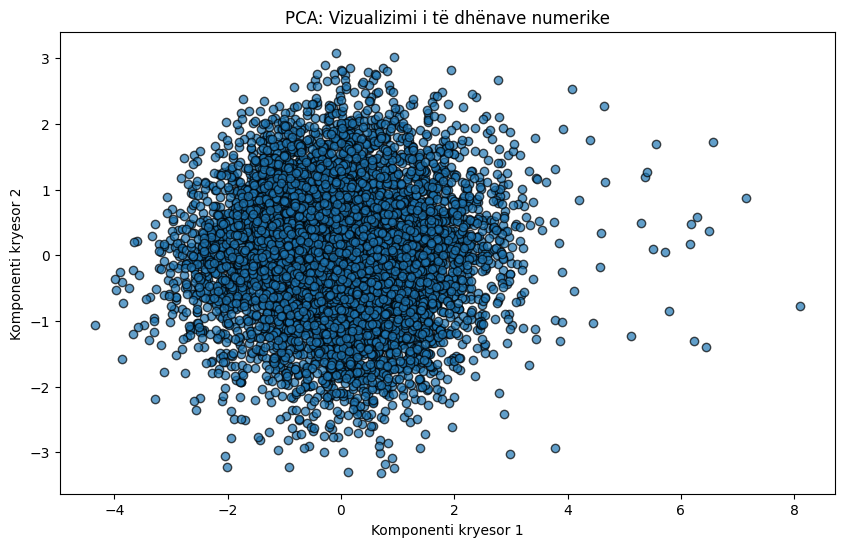


Shpërndarja e frekuencës së të dhënave kategorike (në përqindje):

Kolona: Parental_Involvement
Parental_Involvement
Medium    50.885425
High      28.878462
Low       20.236113
Name: proportion, dtype: float64


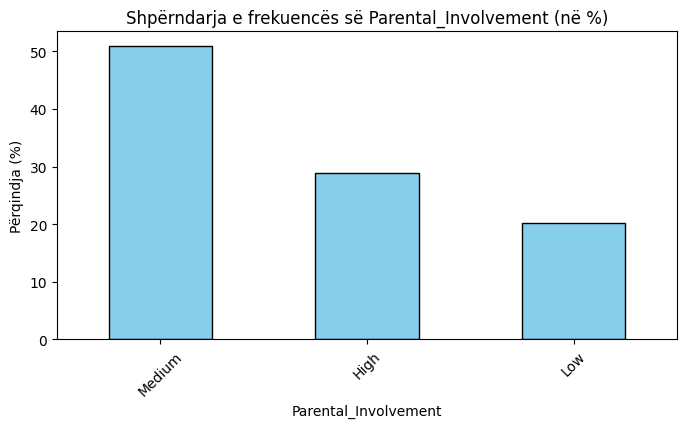


Kolona: Extracurricular_Activities
Extracurricular_Activities
Yes    59.603451
No     40.396549
Name: proportion, dtype: float64


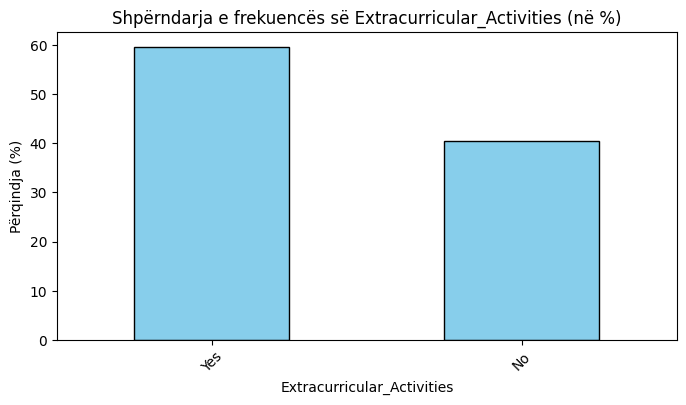


Kolona: Motivation_Level
Motivation_Level
Medium    50.718934
Low       29.317391
High      19.963675
Name: proportion, dtype: float64


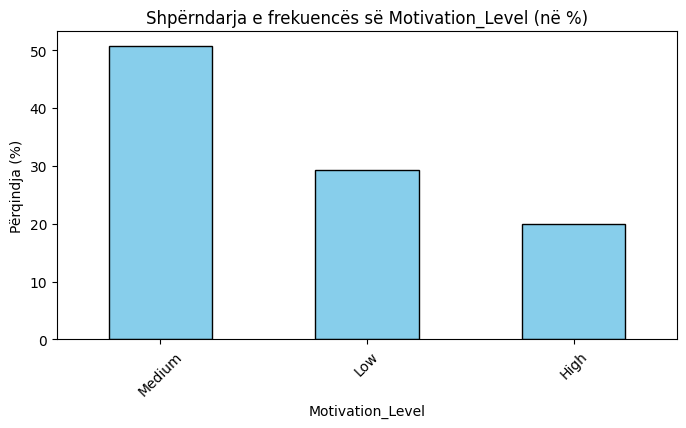


Kolona: Internet_Access
Internet_Access
Yes    92.447404
No      7.552596
Name: proportion, dtype: float64


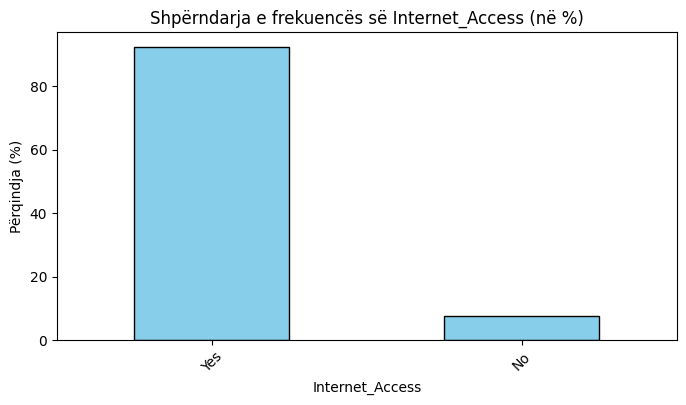


Kolona: Family_Income
Family_Income
Low       40.441956
Medium    40.351143
High      19.206902
Name: proportion, dtype: float64


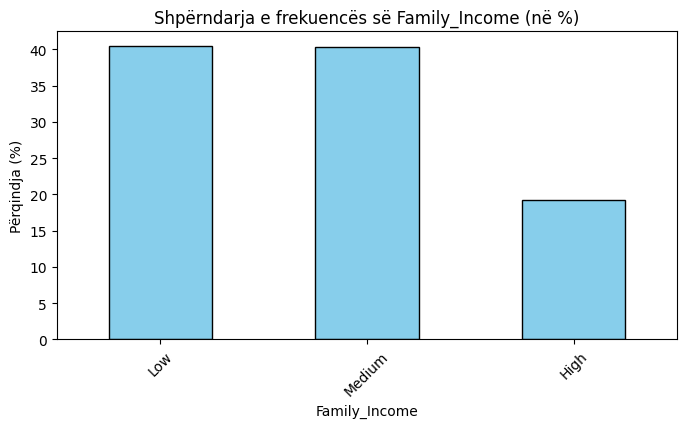


Kolona: Teacher_Quality
Teacher_Quality
Medium    60.587256
High      29.468745
Low        9.943999
Name: proportion, dtype: float64


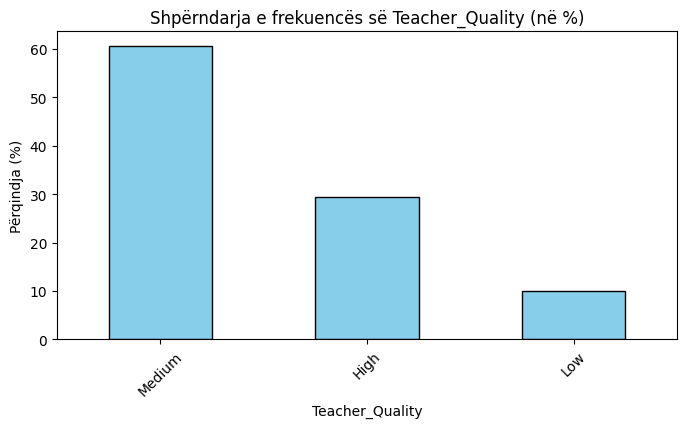


Kolona: School_Type
School_Type
Public     69.592856
Private    30.407144
Name: proportion, dtype: float64


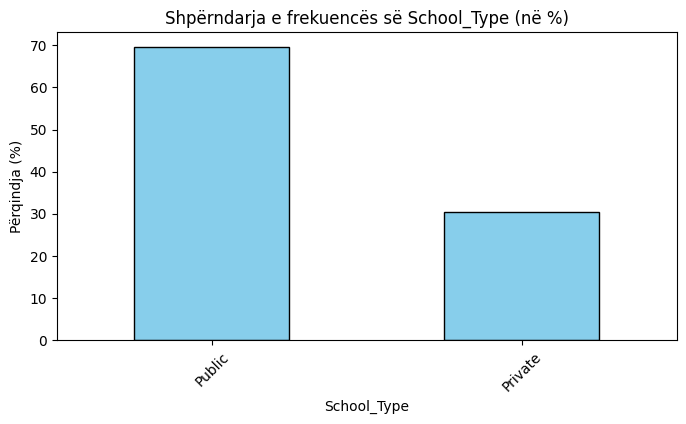


Kolona: Peer_Influence
Peer_Influence
Positive    39.927350
Neutral     39.231119
Negative    20.841532
Name: proportion, dtype: float64


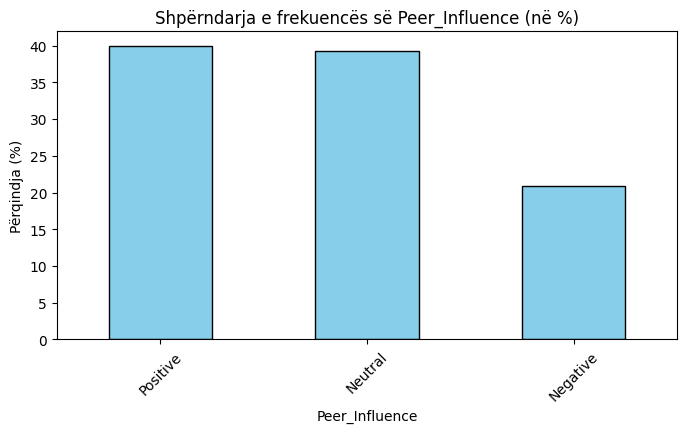


Kolona: Learning_Disabilities
Learning_Disabilities
No     89.480854
Yes    10.519146
Name: proportion, dtype: float64


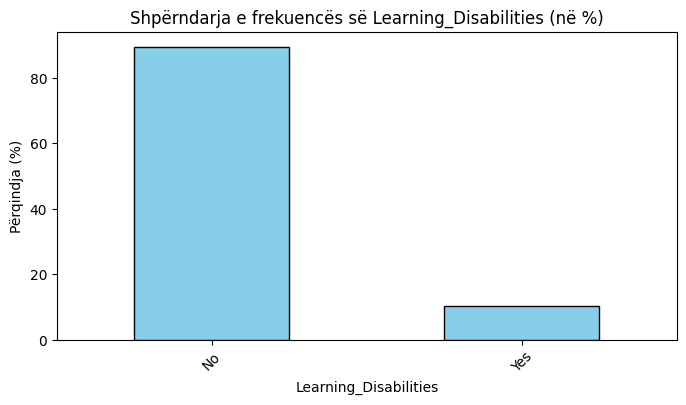


Kolona: Parental_Education_Level
Parental_Education_Level
High School     50.143787
College         30.104435
Postgraduate    19.751778
Name: proportion, dtype: float64


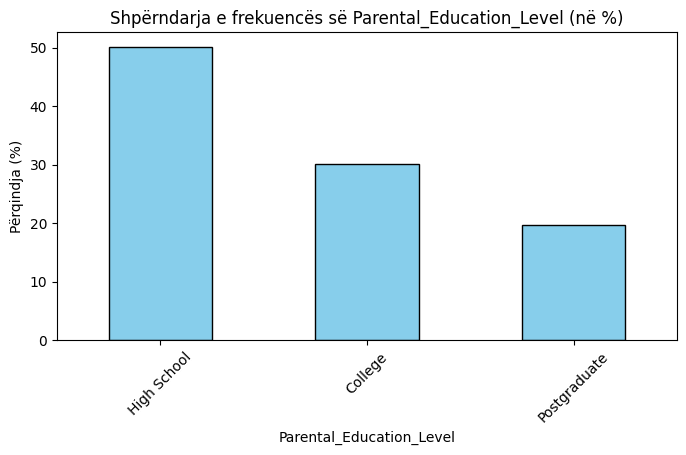


Kolona: Distance_from_Home
Distance_from_Home
Near        59.800212
Moderate    30.240654
Far          9.959134
Name: proportion, dtype: float64


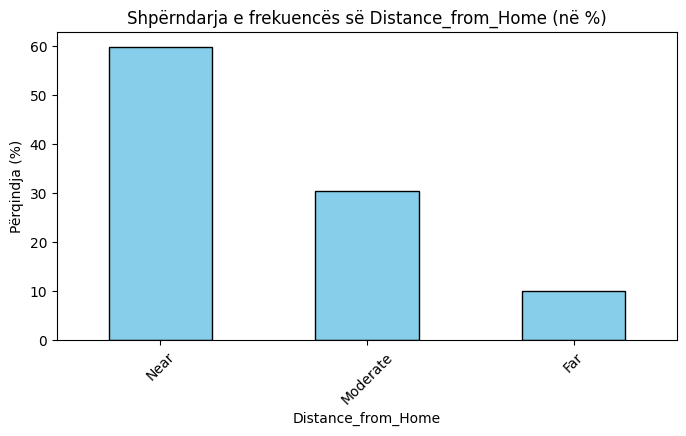


Kolona: Gender
Gender
Male      57.726654
Female    42.273346
Name: proportion, dtype: float64


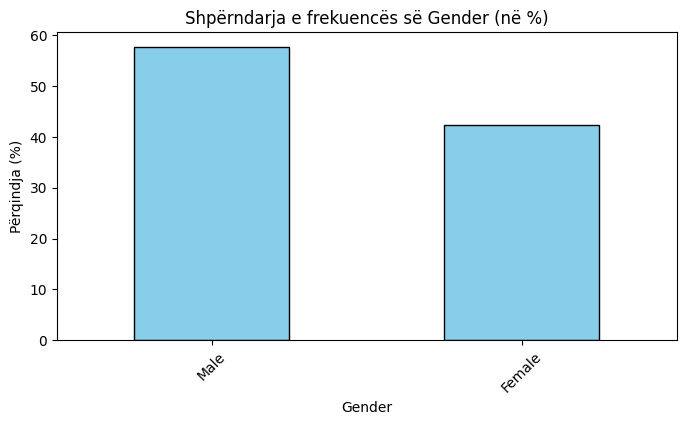

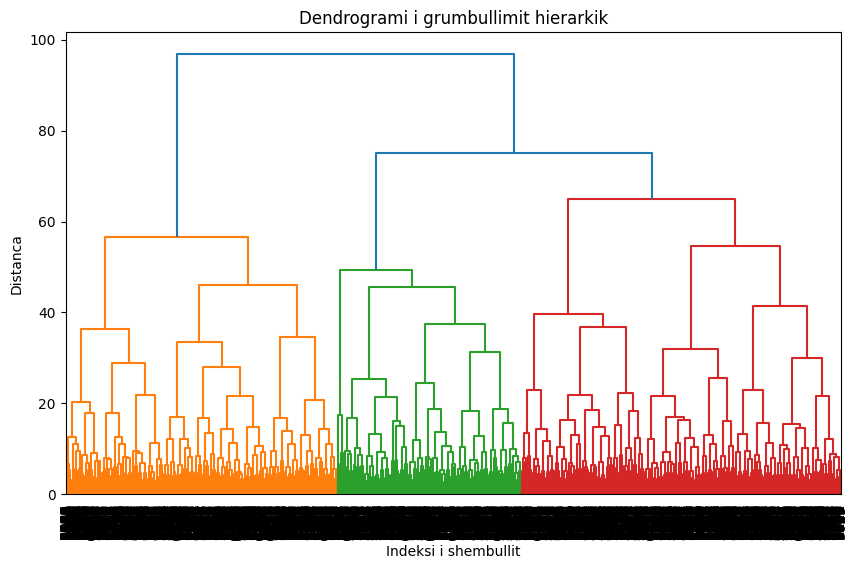


Statistikat përmbledhëse për të dhënat Numerike:
                    count       mean        std   min   25%   50%   75%    max
Hours_Studied      6607.0  19.975329   5.990594   1.0  16.0  20.0  24.0   44.0
Attendance         6607.0  79.977448  11.547475  60.0  70.0  80.0  90.0  100.0
Sleep_Hours        6607.0   7.029060   1.468120   4.0   6.0   7.0   8.0   10.0
Previous_Scores    6607.0  75.070531  14.399784  50.0  63.0  75.0  88.0  100.0
Tutoring_Sessions  6607.0   1.493719   1.230570   0.0   1.0   1.0   2.0    8.0
Physical_Activity  6607.0   2.967610   1.031231   0.0   2.0   3.0   4.0    6.0
Exam_Score         6607.0  67.235659   3.890456  55.0  65.0  67.0  69.0  101.0


In [5]:
# Zgjedhja e të dhënave numerike nga dataseti
numeric_data = pre_df.select_dtypes(include=['number'])
categorical_data = pre_df.select_dtypes(exclude=['number'])

# 1. Analiza e të dhënave numerike
# a. Analiza e korrelacionit
print("Matrica e korrelacionit:")
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matrica e korrelacionit")
plt.show()

# b. PCA për vizualizim
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data.fillna(0))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, edgecolor='k')
plt.title("PCA: Vizualizimi i të dhënave numerike")
plt.xlabel("Komponenti kryesor 1")
plt.ylabel("Komponenti kryesor 2")
plt.show()

# 2. Analiza e të dhënave kategorike
# a. Shpërndarja e frekuencës
print("\nShpërndarja e frekuencës së të dhënave kategorike (në përqindje):")
for col in categorical_data.columns:
    print(f"\nKolona: {col}")
    
    # Përqindjet për secilën kategori
    freq_percent = categorical_data[col].value_counts(normalize=True) * 100
    print(freq_percent)
    
    # Vizualizimi i shpërndarjes së frekuencës
    freq_percent.plot(kind='bar', figsize=(8, 4), color='skyblue', edgecolor='black')
    plt.title(f"Shpërndarja e frekuencës së {col} (në %)")
    plt.xlabel(col)
    plt.ylabel("Përqindja (%)")
    plt.xticks(rotation=45)
    plt.show()


# 3. Analiza e grumbullimit (clustering)
# Grumbullimi hierarkik
linkage_matrix = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=10.)
plt.title("Dendrogrami i grumbullimit hierarkik")
plt.xlabel("Indeksi i shembullit")
plt.ylabel("Distanca")
plt.show()

# 4. Përmbledhje
# Shfaq statistikat përmbledhëse për të dhënat numerike
print("\nStatistikat përmbledhëse për të dhënat Numerike:")
print(numeric_data.describe().transpose())
